# Advanced Matplotlib Graphing Assignment

Dataset

ConstructionTimeSeriesDatav2.csv

### Pre-Processing

In [123]:
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt

df_const = pd.read_csv('ConstructionTimeSeriesDatav2.csv')

In [3]:
df_const.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375


In [4]:
df_const.shape

(146, 5)

In [5]:
df_const

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375
...,...,...,...,...,...
141,142,Oct-13,85193,59370,25823
142,143,Nov-13,77931,55191,22741
143,144,Dec-13,71502,52132,19369
144,145,Jan-14,64661,47827,16834


In [7]:
df_const['Difference'] = df_const['Private Construction']-df_const['Public Construction']

In [10]:
df_const['Difference'].describe()

count      146.000000
mean     35273.643836
std      13124.108811
min      11192.000000
25%      23957.000000
50%      35614.000000
75%      46024.250000
max      59301.000000
Name: Difference, dtype: float64

In [11]:
df_const.dtypes

Month                    int64
Month-Year              object
Total Construction       int64
Private Construction     int64
Public Construction      int64
Difference               int64
dtype: object

In [22]:
for i in range(len(df_const['Month-Year'])):
    df_const['Month-Year'][i] = df_const['Month-Year'][i].replace('-','')

<ipython-input-22-7e431db3b59a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_const['Month-Year'][i] = df_const['Month-Year'][i].replace(' ','')


In [74]:
df_const['Date DT'] = pd.to_datetime(df_const['Month-Year'], format='%b%y')

In [112]:
df_const.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction,Difference,Date DT
0,1,Jan02,59516,45273,14243,31030,2002-01-01
1,2,Feb02,58588,44475,14113,30362,2002-02-01
2,3,Mar02,63782,49396,14386,35010,2002-03-01
3,4,Apr02,69504,53283,16221,37062,2002-04-01
4,5,May02,73384,55009,18375,36634,2002-05-01


## Create the Graph

In [85]:
date = df_const['Date DT'] 
diff = df_const['Difference'] 

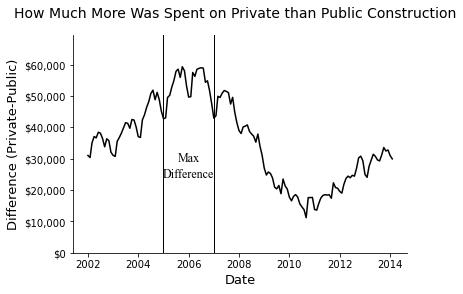

In [122]:
fig,ax = plt.subplots()

fig.suptitle('How Much More Was Spent on Private than Public Construction',fontsize=14)

ax.plot(date,diff,color='k')
ax.xaxis.set_label_text('Date',fontsize=13)  # x-axis caption
ax.yaxis.set_label_text('Difference (Private-Public)',fontsize=13) # y-axis caption

# Vertical Lines
ax.axvline(pd.to_datetime('2005-01-01'),linewidth=1,color='k',label='Low',linestyle='-')
ax.axvline(pd.to_datetime('2007-01-01'),linewidth=1,color='k',label='High',linestyle='-')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Axis limits
ax.set_ylim(0,max(diff)+10000)

# Y tick labels
ax.set_yticklabels(["${:,.0f}".format(x) for x in ax.get_yticks()])

# Text
ax.text(pd.to_datetime('2006-01-01'),30000,'Max',fontsize=12,verticalalignment='center',\
        horizontalalignment='center',fontname='Times New Roman')
ax.text(pd.to_datetime('2006-01-01'),25000,'Difference',fontsize=12,verticalalignment='center',\
        horizontalalignment='center',fontname='Times New Roman')

plt.show()

The chart above shows the difference between the spend on private versus public construction. The highlighted portion emphasizes the time period of 2005 - 2007 in which private spend was the highest relative to the public construction spend. Of course, this would be tailored to an audience in which the salient aspect is the comparison of spend for private relative to public. If the concern is how much public spend relative to private, then perhaps the period to highlight would be 2010 - 2012.